In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, mean_squared_error, r2_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
     

In [33]:
data= pd.read_csv('/kaggle/input/customer/Mall_Customers.csv')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [35]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [36]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [55]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.515000
std,57.879185,13.969007,26.264721,25.823522,1.569103
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,3.000000
max,200.000000,70.000000,137.000000,99.000000,4.000000


In [56]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,Gender_Male
0,1,19,15,39,2,True
1,2,21,15,81,3,True
2,3,20,16,6,2,False
3,4,23,16,77,3,False
4,5,31,17,40,2,False


<Axes: xlabel='Gender', ylabel='Count'>

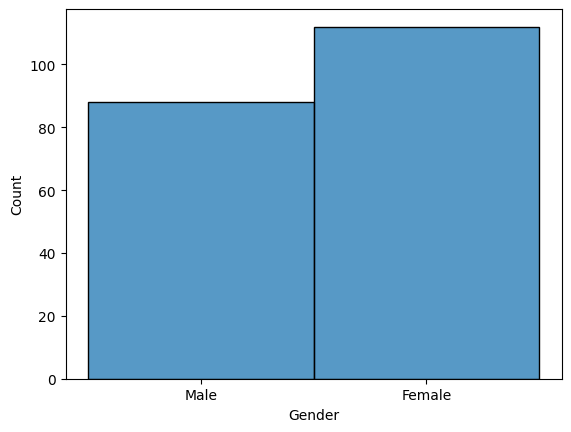

In [37]:

sns.histplot(data['Gender'])

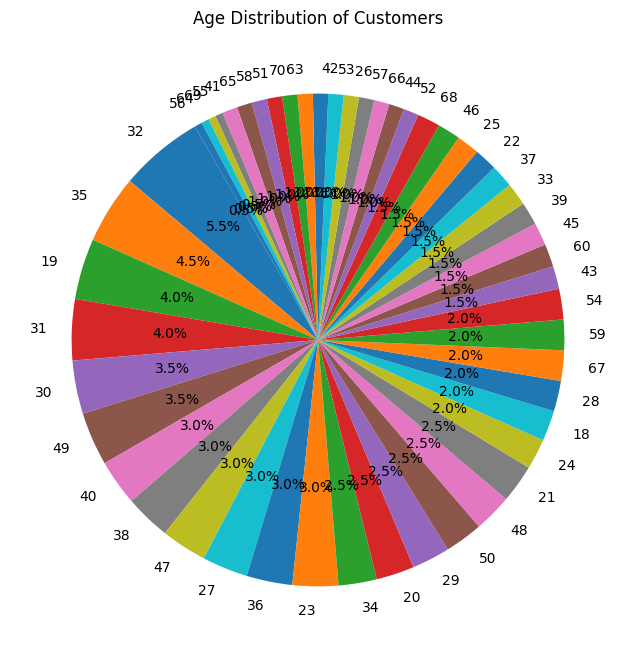

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Correct column name:
Age_counts = data['Age'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(Age_counts, labels=Age_counts.index, autopct='%1.1f%%', startangle=120)
plt.title('Age Distribution of Customers')
plt.show()

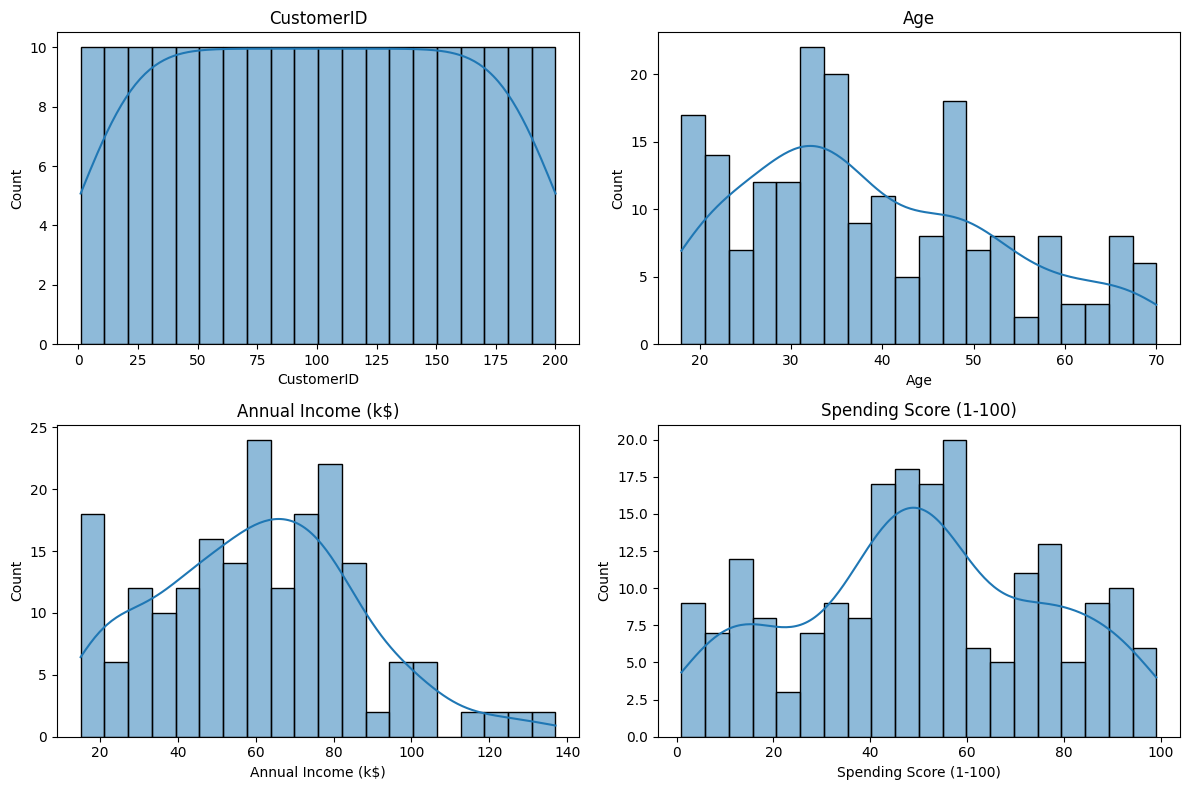

In [38]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
n = len(numeric_cols)
fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(12, 4*((n+1)//2)))

axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"{col}")

# Hide extra axes if odd number
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

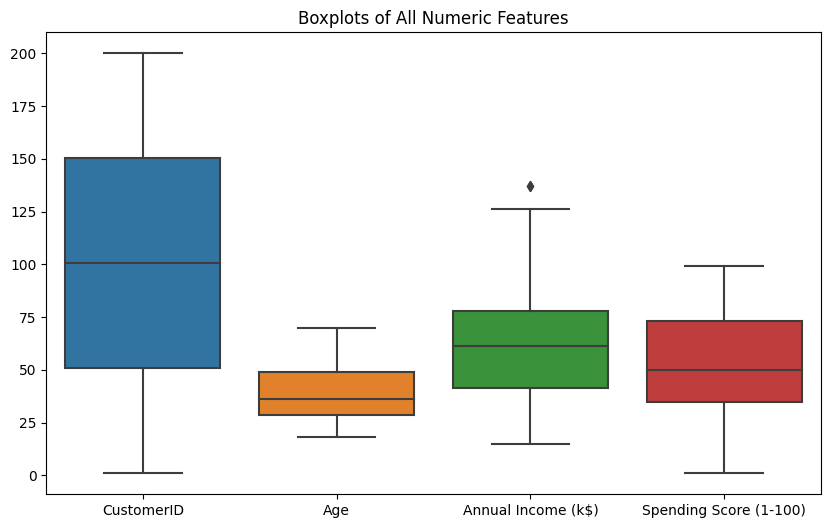

In [39]:

plt.figure(figsize=(10,6))
sns.boxplot(data=data[numeric_cols])
plt.title("Boxplots of All Numeric Features")
plt.show()

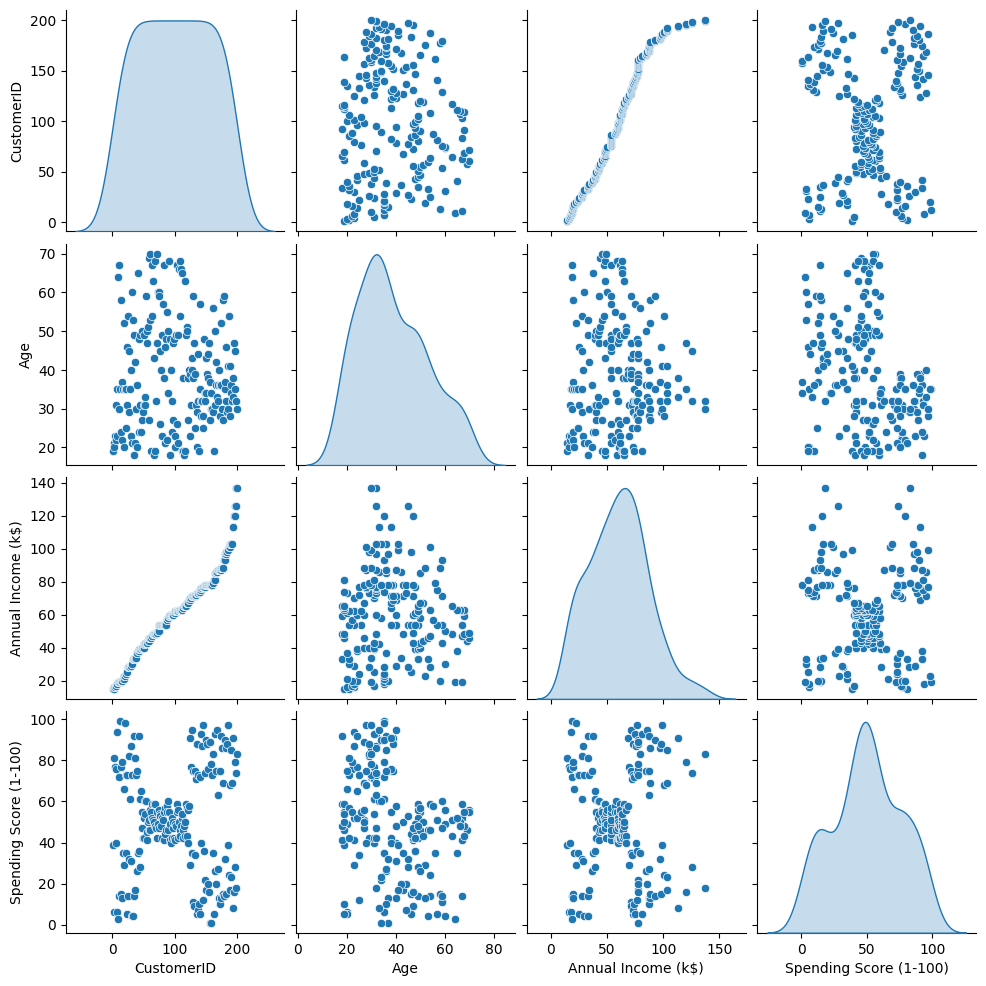

In [40]:

sns.pairplot(data[numeric_cols], diag_kind='kde')
plt.show()

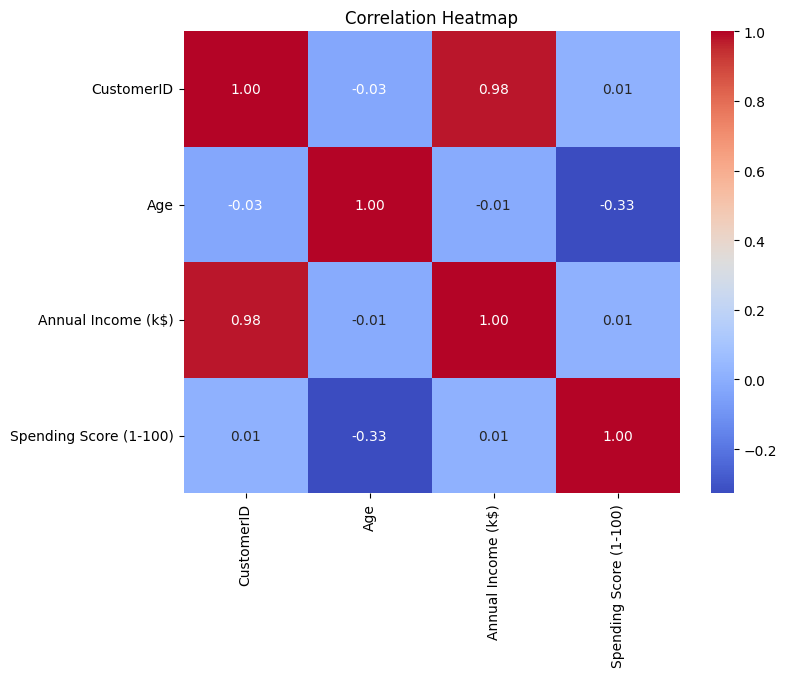

In [41]:

plt.figure(figsize=(8,6))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
     

In [42]:
print(data.columns)
data= pd.get_dummies(hd, columns=['Gender'], drop_first=True)
print(data.columns)
     

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Cluster', 'Gender_Male'],
      dtype='object')


In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(hd[['Annual Income (k$)', 'Spending Score (1-100)']])
     

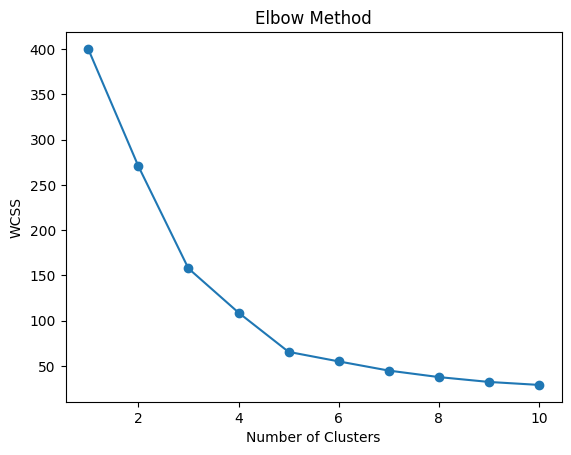

In [44]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()



In [45]:

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)
hd['Cluster'] = labels
hd.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


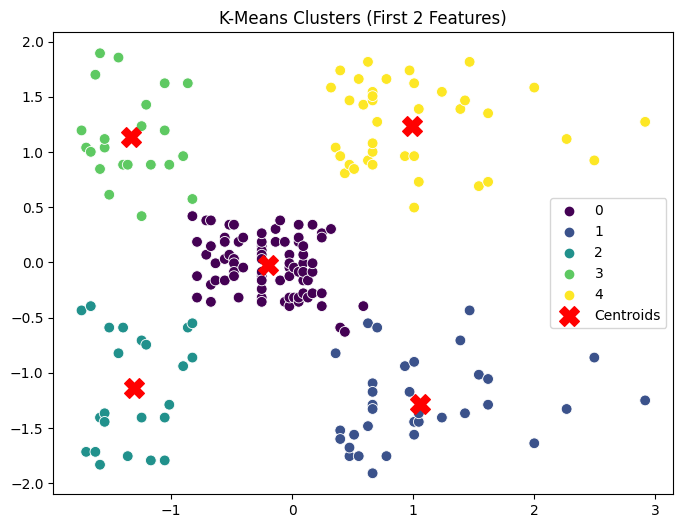

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette='viridis', s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clusters (First 2 Features)")
plt.legend()
plt.show()

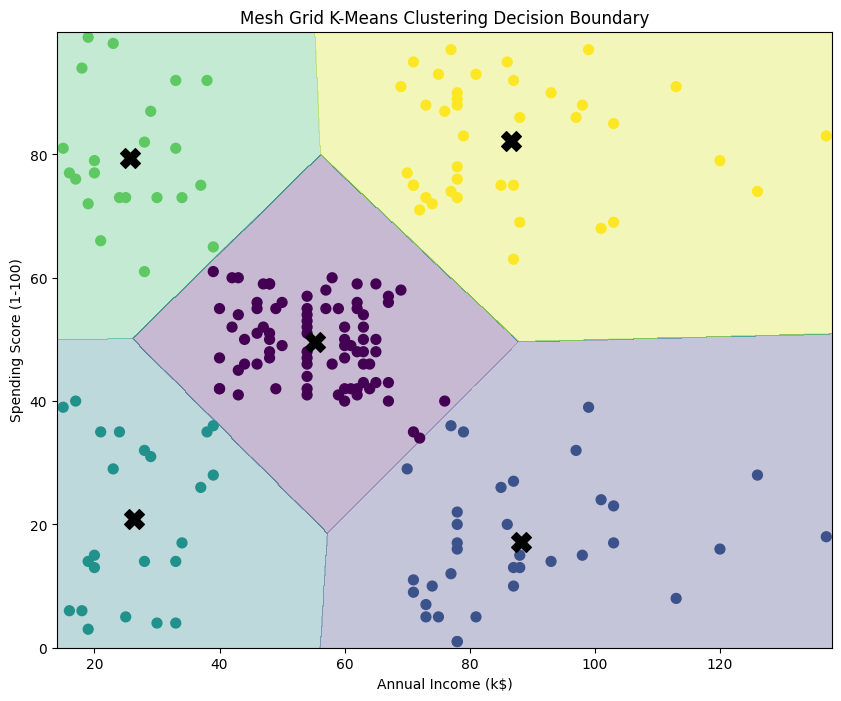

In [50]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Run K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Create mesh grid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict cluster for each point in the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10,8))
plt.contourf(xx, yy, Z, alpha=0.3)

# Plot actual data points
plt.scatter(X[:,0], X[:,1], c=labels, s=50)

# Plot cluster centers
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, marker='X')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mesh Grid K-Means Clustering Decision Boundary')
plt.show()

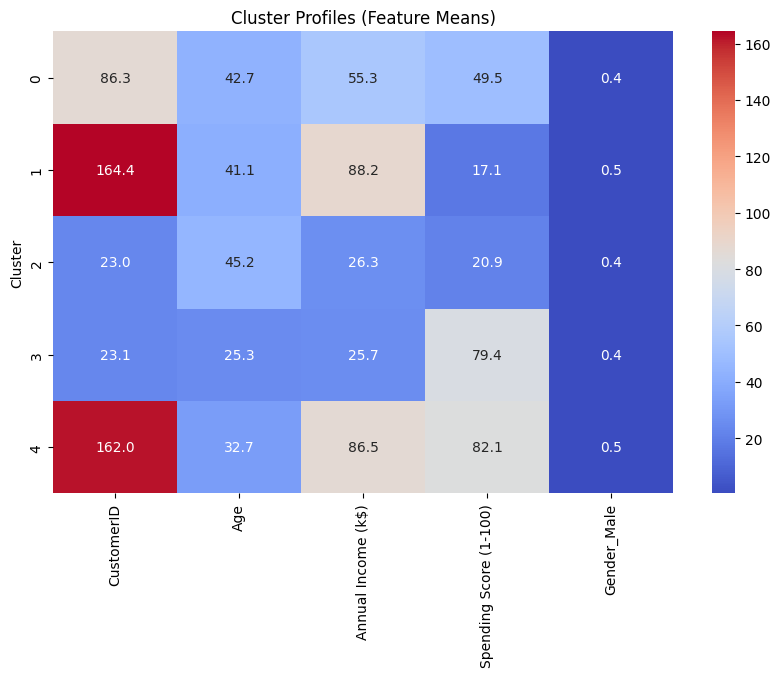

In [48]:

cluster_profile = data.groupby('Cluster').mean()
plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Cluster Profiles (Feature Means)")
plt.show()
